In [70]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
import os
import re

# 将匹配表按信噪比snrg分为多个文件，并分别下载链接
Dividing the APOGEE-LAMOST cross-match table into intervals according to the signal-to-noise ratio

## 读文件

In [80]:
match = pd.read_csv('./data/match.csv')

In [81]:
match.columns

Index(['ASPCAP_starid', 'ASPCAP_RA', 'ASPCAP_Dec', 'ASPCAP_RV',
       'ASPCAP_Teff[K]', 'ASPCAP_Logg', 'ASPCAP_CH', 'ASPCAP_NH', 'ASPCAP_OH',
       'ASPCAP_MgH', 'ASPCAP_AlH', 'ASPCAP_SiH', 'ASPCAP_SH', 'ASPCAP_KH',
       'ASPCAP_CaH', 'ASPCAP_TiH', 'ASPCAP_CrH', 'ASPCAP_MnH', 'ASPCAP_FeH',
       'ASPCAP_NiH', 'lamost_obsid', 'lamost_snrg', 'lamost_class',
       'lamost_subclass', 'lamost_z', 'lamost_ra', 'lamost_dec', 'lamost_logg',
       'lamost_file', 'GroupID', 'GroupSize', 'Separation'],
      dtype='object')

## 定义拆分函数

In [82]:
folder_path = "./snrg_other"
def depart(i,j):
    snrg=match.iloc[np.where((match["lamost_snrg"]>=i)&(match["lamost_snrg"]<j))]
    print("snrg_{}_{}".format(i,j)," len:",len(snrg))
    snrg.to_csv(os.path.join(folder_path, "match_{}_{}.csv".format(i,j))) 
    return snrg

In [83]:
def depart2(i):
    snrg=match.iloc[np.where(match["lamost_snrg"]>=i)]
    print("snrg_{}".format(i)," len:",len(snrg))
    snrg.to_csv(os.path.join(folder_path, "match_{}.csv".format(i))) 
    return snrg

## 进行拆分

In [84]:
depart(5,8)

snrg_5_8  len: 10304


,ASPCAP_starid,ASPCAP_RA,ASPCAP_Dec,ASPCAP_RV,ASPCAP_Teff[K],ASPCAP_Logg,ASPCAP_CH,ASPCAP_NH,ASPCAP_OH,ASPCAP_MgH,...,lamost_class,lamost_subclass,lamost_z,lamost_ra,lamost_dec,lamost_logg,lamost_file,GroupID,GroupSize,Separation
1,2M00000068+5710233,0.002850,57.173164,-12.673787,5031.2637,3.456132,-0.186011,-0.076104,-0.046582,-0.068220,...,STAR,K1,0.000051,0.002860,57.173136,NaN,20141120/HD000408N565515V01/spec-56982-HD00040...,NaN,NaN,0.101147
5,2M00001616+1606151,0.067374,16.104208,-52.384567,4742.7450,3.256629,0.198082,0.377840,0.191614,0.299753,...,STAR,G5,-0.000158,0.067390,16.104200,NaN,20120928/EG000313N173308V_1/spec-56199-EG00031...,NaN,NaN,0.062385
6,2M00002189+1514141,0.091236,15.237252,5.974392,5853.6680,4.124110,-0.176093,0.068992,0.137250,0.018105,...,STAR,G2,-0.000120,0.091247,15.237289,NaN,20120928/EG000313N173308V_2/spec-56199-EG00031...,NaN,NaN,0.138572
32,2M00005407+5600006,0.225321,56.000191,-9.268898,4934.1323,3.047764,-0.132271,-0.150418,-0.071593,-0.101297,...,STAR,G5,-0.000039,0.225373,56.000186,3.528,20141120/HD000408N565515B01/spec-56982-HD00040...,NaN,NaN,0.106296
41,2M00010132+0031530,0.255541,0.531393,6.613448,4743.3496,3.047138,-0.095610,-0.090840,-0.023707,0.056523,...,STAR,F9,-0.000018,0.255550,0.531462,3.030,20121012/EG000023N024031B01/spec-56213-EG00002...,NaN,NaN,0.250504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272371,2M23551481+1603334,358.811734,16.059288,-41.194030,5096.0938,3.210041,-0.593270,-0.714624,-0.313747,-0.411837,...,STAR,F9,-0.000009,358.811748,16.059301,NaN,20120928/EG000313N173308V_2/spec-56199-EG00031...,NaN,NaN,0.067350
272396,2M23564626+1555511,359.192761,15.930881,-106.632960,4970.2840,2.439691,-1.548920,-1.902410,-1.147337,-1.052317,...,STAR,G0,-0.000544,359.192769,15.930909,NaN,20120928/EG000313N173308V_1/spec-56199-EG00031...,NaN,NaN,0.104535
272433,2M23581108+1654346,359.546187,16.909637,-80.242480,4670.4440,2.591590,-0.239888,-0.182290,-0.042107,-0.054747,...,STAR,G5,-0.000287,359.546203,16.909615,NaN,20120928/EG000313N173308V_2/spec-56199-EG00031...,NaN,NaN,0.096487
272454,2M23585855+1542330,359.743988,15.709185,-58.369415,4731.6196,2.986895,0.070737,0.174296,0.100209,0.202709,...,STAR,G5,-0.000240,359.743994,15.709171,NaN,20120928/EG000313N173308V_2/spec-56199-EG00031...,NaN,NaN,0.054521


In [85]:
depart(8,10)

snrg_8_10  len: 5927


,ASPCAP_starid,ASPCAP_RA,ASPCAP_Dec,ASPCAP_RV,ASPCAP_Teff[K],ASPCAP_Logg,ASPCAP_CH,ASPCAP_NH,ASPCAP_OH,ASPCAP_MgH,...,lamost_class,lamost_subclass,lamost_z,lamost_ra,lamost_dec,lamost_logg,lamost_file,GroupID,GroupSize,Separation
42,2M00010201+0101148,0.258393,1.020797,-12.524097,4740.2847,4.558092,0.147730,0.346460,0.142811,0.214673,...,STAR,K4,-0.000028,0.258372,1.020789,4.585,20121012/EG000023N024031B01/spec-56213-EG00002...,NaN,NaN,0.080889
112,2M00015950+1632062,0.497948,16.535059,-11.802539,4926.7583,4.580678,-0.068633,-0.050677,-0.029479,0.007395,...,STAR,G9,-0.000043,0.497951,16.535036,NaN,20120928/EG000313N173308V_1/spec-56199-EG00031...,NaN,NaN,0.083445
113,2M00015968+1549448,0.498688,15.829115,-39.605050,5644.2830,4.445412,-0.040952,-0.067150,0.063643,0.029604,...,STAR,G3,-0.000189,0.498683,15.829114,NaN,20120928/EG000313N173308V_1/spec-56199-EG00031...,NaN,NaN,0.017688
117,2M00020656+1509091,0.527351,15.152548,-29.761864,4720.2420,2.865655,-0.048577,0.023377,0.062410,0.071110,...,STAR,G5,-0.000133,0.527349,15.152551,NaN,20120928/EG000313N173308V_2/spec-56199-EG00031...,NaN,NaN,0.012843
246,2M00041705+1542138,1.071081,15.703844,-24.840681,5508.2470,4.456132,0.098260,0.373030,0.247398,0.284916,...,STAR,G7,-0.000128,1.071076,15.703805,NaN,20120928/EG000313N173308V_2/spec-56199-EG00031...,NaN,NaN,0.141465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272214,2M23415286+3036407,355.470288,30.611320,-77.102100,5623.9540,4.412389,-0.030931,0.034148,0.078311,0.069866,...,STAR,G6,-0.000326,355.470316,30.611305,NaN,20161207/EG234939N285032V01/spec-57730-EG23493...,NaN,NaN,0.102186
272229,2M23423111+2931008,355.629651,29.516901,-27.717940,4453.0176,1.822980,-0.444801,-0.301940,-0.280807,-0.310334,...,STAR,G5,-0.000103,355.629625,29.516918,NaN,20161207/EG234939N285032V01/spec-57730-EG23493...,NaN,NaN,0.101520
272348,2M23541908+1657593,358.579537,16.966494,-75.415535,4991.6177,3.307023,-0.374850,-0.677300,-0.141387,-0.200607,...,STAR,G7,-0.000217,358.579564,16.966496,NaN,20120928/EG000313N173308V_1/spec-56199-EG00031...,NaN,NaN,0.093248
272417,2M23573486+1604520,359.395286,16.081118,-21.503506,4938.6367,2.462813,-0.518213,-0.319320,-0.440299,-0.358002,...,STAR,G7,-0.000047,359.395247,16.081136,NaN,20120928/EG000313N173308V_2/spec-56199-EG00031...,NaN,NaN,0.149662


In [86]:
for i in range(10):
    depart(10*i,10*(i+1))

snrg_0_10  len: 16231
snrg_10_20  len: 25667
snrg_20_30  len: 21994
snrg_30_40  len: 20486
snrg_40_50  len: 19036
snrg_50_60  len: 17764
snrg_60_70  len: 16288
snrg_70_80  len: 14637
snrg_80_90  len: 13225
snrg_90_100  len: 11828


In [87]:
depart2(100)

snrg_100  len: 95326


,ASPCAP_starid,ASPCAP_RA,ASPCAP_Dec,ASPCAP_RV,ASPCAP_Teff[K],ASPCAP_Logg,ASPCAP_CH,ASPCAP_NH,ASPCAP_OH,ASPCAP_MgH,...,lamost_class,lamost_subclass,lamost_z,lamost_ra,lamost_dec,lamost_logg,lamost_file,GroupID,GroupSize,Separation
0,2M00000032+5737103,0.001335,57.619530,-20.545164,6099.7810,3.673970,-0.140240,-0.138410,-0.207901,-0.214476,...,STAR,F5,-0.000073,0.001346,57.619516,3.977,20141120/HD000408N565515V01/spec-56982-HD00040...,NaN,NaN,0.055723
8,2M00002707+1424316,0.112800,14.408790,-18.562143,5708.7505,4.395063,-0.083910,0.300920,0.011154,0.050319,...,STAR,G6,-0.000078,0.112808,14.408787,4.370,20121013/EG000024N121601B01/spec-56214-EG00002...,NaN,NaN,0.029912
13,2M00003312+5504379,0.138007,55.077217,1.844279,5247.2505,4.540851,0.090594,0.194237,0.150850,0.115423,...,STAR,G8,-0.000028,0.138010,55.077198,4.615,20141120/HD000408N565515V01/spec-56982-HD00040...,NaN,NaN,0.068679
17,2M00004622+1417117,0.192607,14.286590,-16.836199,5482.7847,4.524241,-0.169285,-0.079733,0.018257,-0.022438,...,STAR,G5,-0.000086,0.192618,14.286583,4.526,20121013/EG000024N121601B01/spec-56214-EG00002...,NaN,NaN,0.045910
18,2M00004664+5523113,0.194344,55.386497,7.972791,4814.5550,2.569550,-0.340195,-0.024350,-0.151503,-0.200169,...,STAR,G5,0.000016,0.194353,55.386514,2.579,20141120/HD000408N565515V01/spec-56982-HD00040...,NaN,NaN,0.063907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272437,2M23581912+5730313,359.579684,57.508713,-36.831580,4774.2360,2.812552,-0.059464,0.279582,0.061876,0.061330,...,STAR,G5,-0.000114,359.579724,57.508673,2.908,20141120/HD000408N565515V01/spec-56982-HD00040...,NaN,NaN,0.162057
272452,2M23585586+1645104,359.732771,16.752901,-4.023880,6600.6157,3.749180,-0.279528,0.479432,-0.172325,-0.339949,...,STAR,F0,-0.000014,359.732772,16.752908,3.815,20120928/EG000313N173308V_1/spec-56199-EG00031...,NaN,NaN,0.025435
272457,2M23590197+1720211,359.758223,17.339214,-39.676838,5054.0977,3.443770,-0.208983,-0.098561,-0.044896,-0.052267,...,STAR,G8,-0.000137,359.758253,17.339203,3.457,20120928/EG000313N173308V_2/spec-56199-EG00031...,NaN,NaN,0.110436
272459,2M23590428+1439332,359.767869,14.659230,8.870801,5876.1333,4.094833,0.005496,0.142924,0.080207,0.049831,...,STAR,G2,-0.000001,359.767880,14.659170,3.958,20121013/EG000024N121601M01/spec-56214-EG00002...,NaN,NaN,0.219371


# 参数直方图

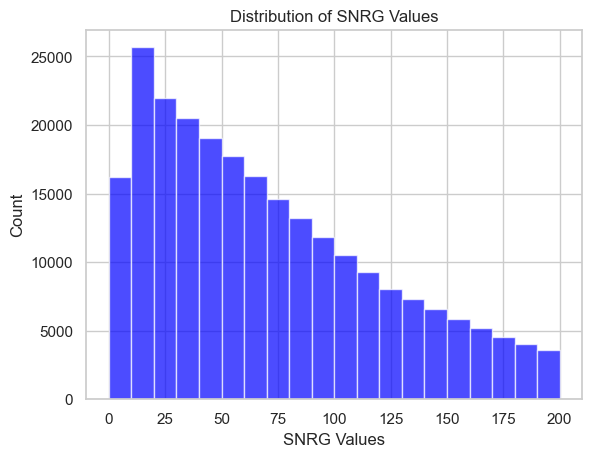

In [88]:
import matplotlib.pyplot as plt

# 假设 snrg_values 包含你的数据
snrg_values = match['lamost_snrg']

# 指定直方图的区间数
num_bins = 20

# 绘制直方图
plt.hist(snrg_values, bins=num_bins, range=(0, 200),color='blue', alpha=0.7)
plt.xlabel('SNRG Values')
plt.ylabel('Count')
plt.title('Distribution of SNRG Values')
plt.grid(True)

# 显示直方图
plt.show()


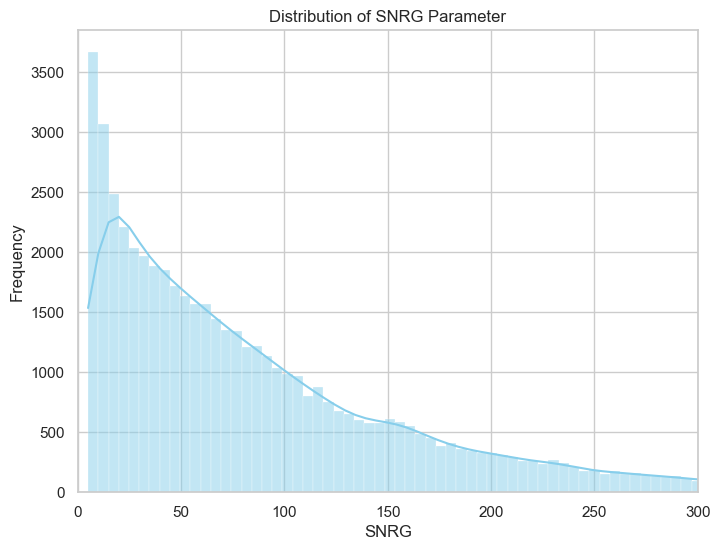

In [69]:
# snrg_data = [2.5, 3.2, 2.8, 4.0, 3.5, 2.7, 3.9, 2.9, 3.1, 3.8, 3.2, 2.6, 3.7, 3.0]
snrg_data = match['lamost_snrg']
# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 创建一个图形
plt.figure(figsize=(8, 6))

# 使用 Seaborn 的 histplot 函数绘制直方图
sns.histplot(snrg_data, bins=200, kde=True, color='skyblue')

# 添加标题和标签
plt.xlim(0, 300)  # 设置 x 轴范围
plt.title('Distribution of SNRG Parameter')
plt.xlabel('SNRG')
plt.ylabel('Frequency')

# 显示图形
plt.show()

# 生成obsid 文件

In [89]:
directory_path =  "./snrg_other"
save_path =  "./download_obsid"

file_list = os.listdir(directory_path)
# 遍历文件列表
for filename in file_list:
    file_path= os.path.join(directory_path, filename)  # 当前文件的path
    # 检查是否为文件（而非子目录）
    if os.path.isfile(file_path):
        save_filename = re.sub(r'\.csv$', '.txt', filename)
        save_file_path = os.path.join(save_path,save_filename)
        catalog = pd.read_csv(file_path) 
        
        # 打开文件写入数据
        with open(save_file_path, 'w') as file:
            # 遍历 'combined_obsid' 列的每个值，并将其写入文件
            for obsid in catalog['lamost_obsid']:
                # 写入注释符号 "#" 和观测ID
                file.write(f'{obsid}\n')



'match_0_10.txt'